In [2]:
from Binaries import *

Hardware = HardwareClassifier()
Hardware.load_and_print_performance("full_random_traces_downsampled_vem_1.000")

print()

for model in os.listdir("/cr/data01/filip/models/"):
    if model in ["ENSEMBLES", "NaiveBayesClassifier", "HardwareClassifier"]: continue       # these aren't trainable
    elif "Normed" in model: continue                                                        # normed layers don't work
    elif "LargeNetwork" in model: continue                                                  # large network smears predictions to random choice

    dataset = "validation_data" if model.split("_")[2] == "FullBandwidth" else "all_energies"
    if dataset == "validation_data" and model.split("_")[-1] != "NoCuts": dataset += "_no_cuts"
    _ = NNClassifier(model, supress_print = True).load_and_print_performance(dataset)


Classifier                                    Dataset                                  TP      FP      TN      FN
HardwareClassifier                            full_random_traces_downsampled...    176394       0       0 1827324 -> ACC =   8.80%

120_TwoLayer_FullBandwidth_NoCuts             validation_data                       83858       0       0   17609 -> ACC =  82.65%
120_OneLargeLayer_HighEnergy_1Muon            all_energies                         280183       0       0 1614532 -> ACC =  14.79%
120_LSTM_HighEnergy_NoCuts                    all_energies                          49348       0       0   14168 -> ACC =  77.69%
120_OneLayer_FullBandwidth_NoCuts             validation_data                       99079       0       0   27429 -> ACC =  78.32%
120_OneLayer_FullBandwidth_1Particle          validation_data_no_cuts               96381       0       0  181283 -> ACC =  34.71%
120_OneLayer_FullBandwidth_2VEM               validation_data_no_cuts               39679       0 

120_LSTM_HighEnergy_NoCuts                    all_energies                          49348       0       0   14168 -> ACC =  77.69%
HardwareClassifier                            full_random_traces_downsampled...    176394       0       0 1827324 -> ACC =   8.80%


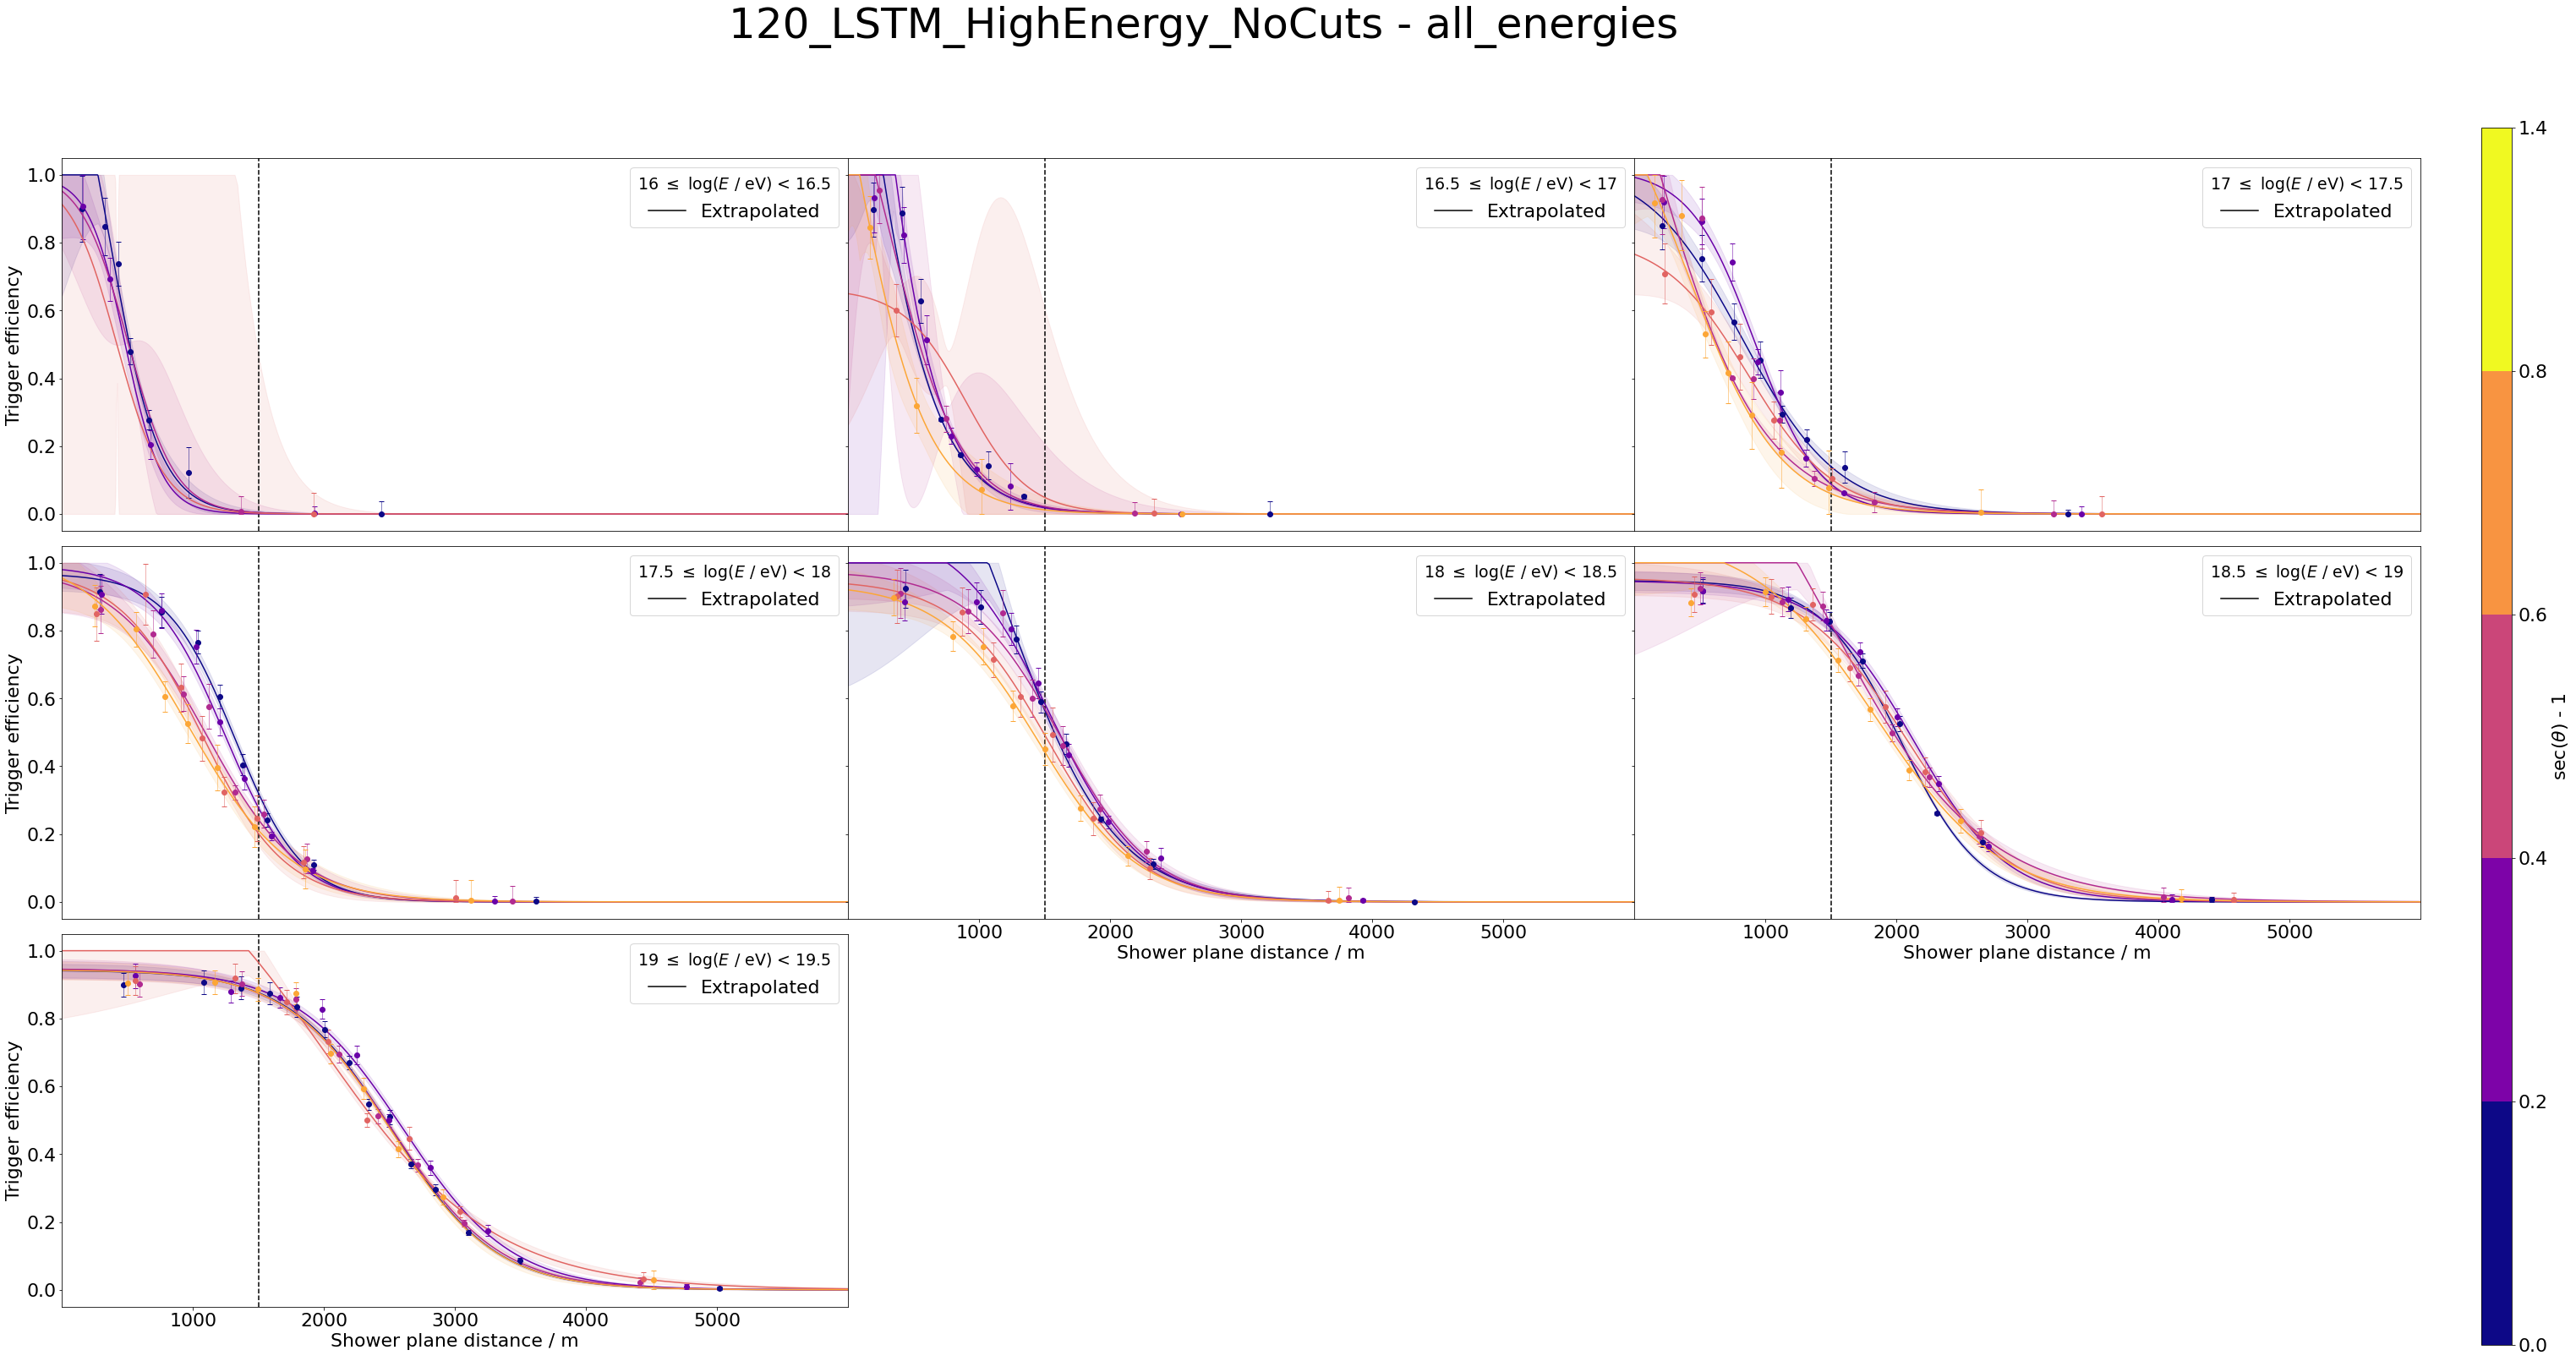

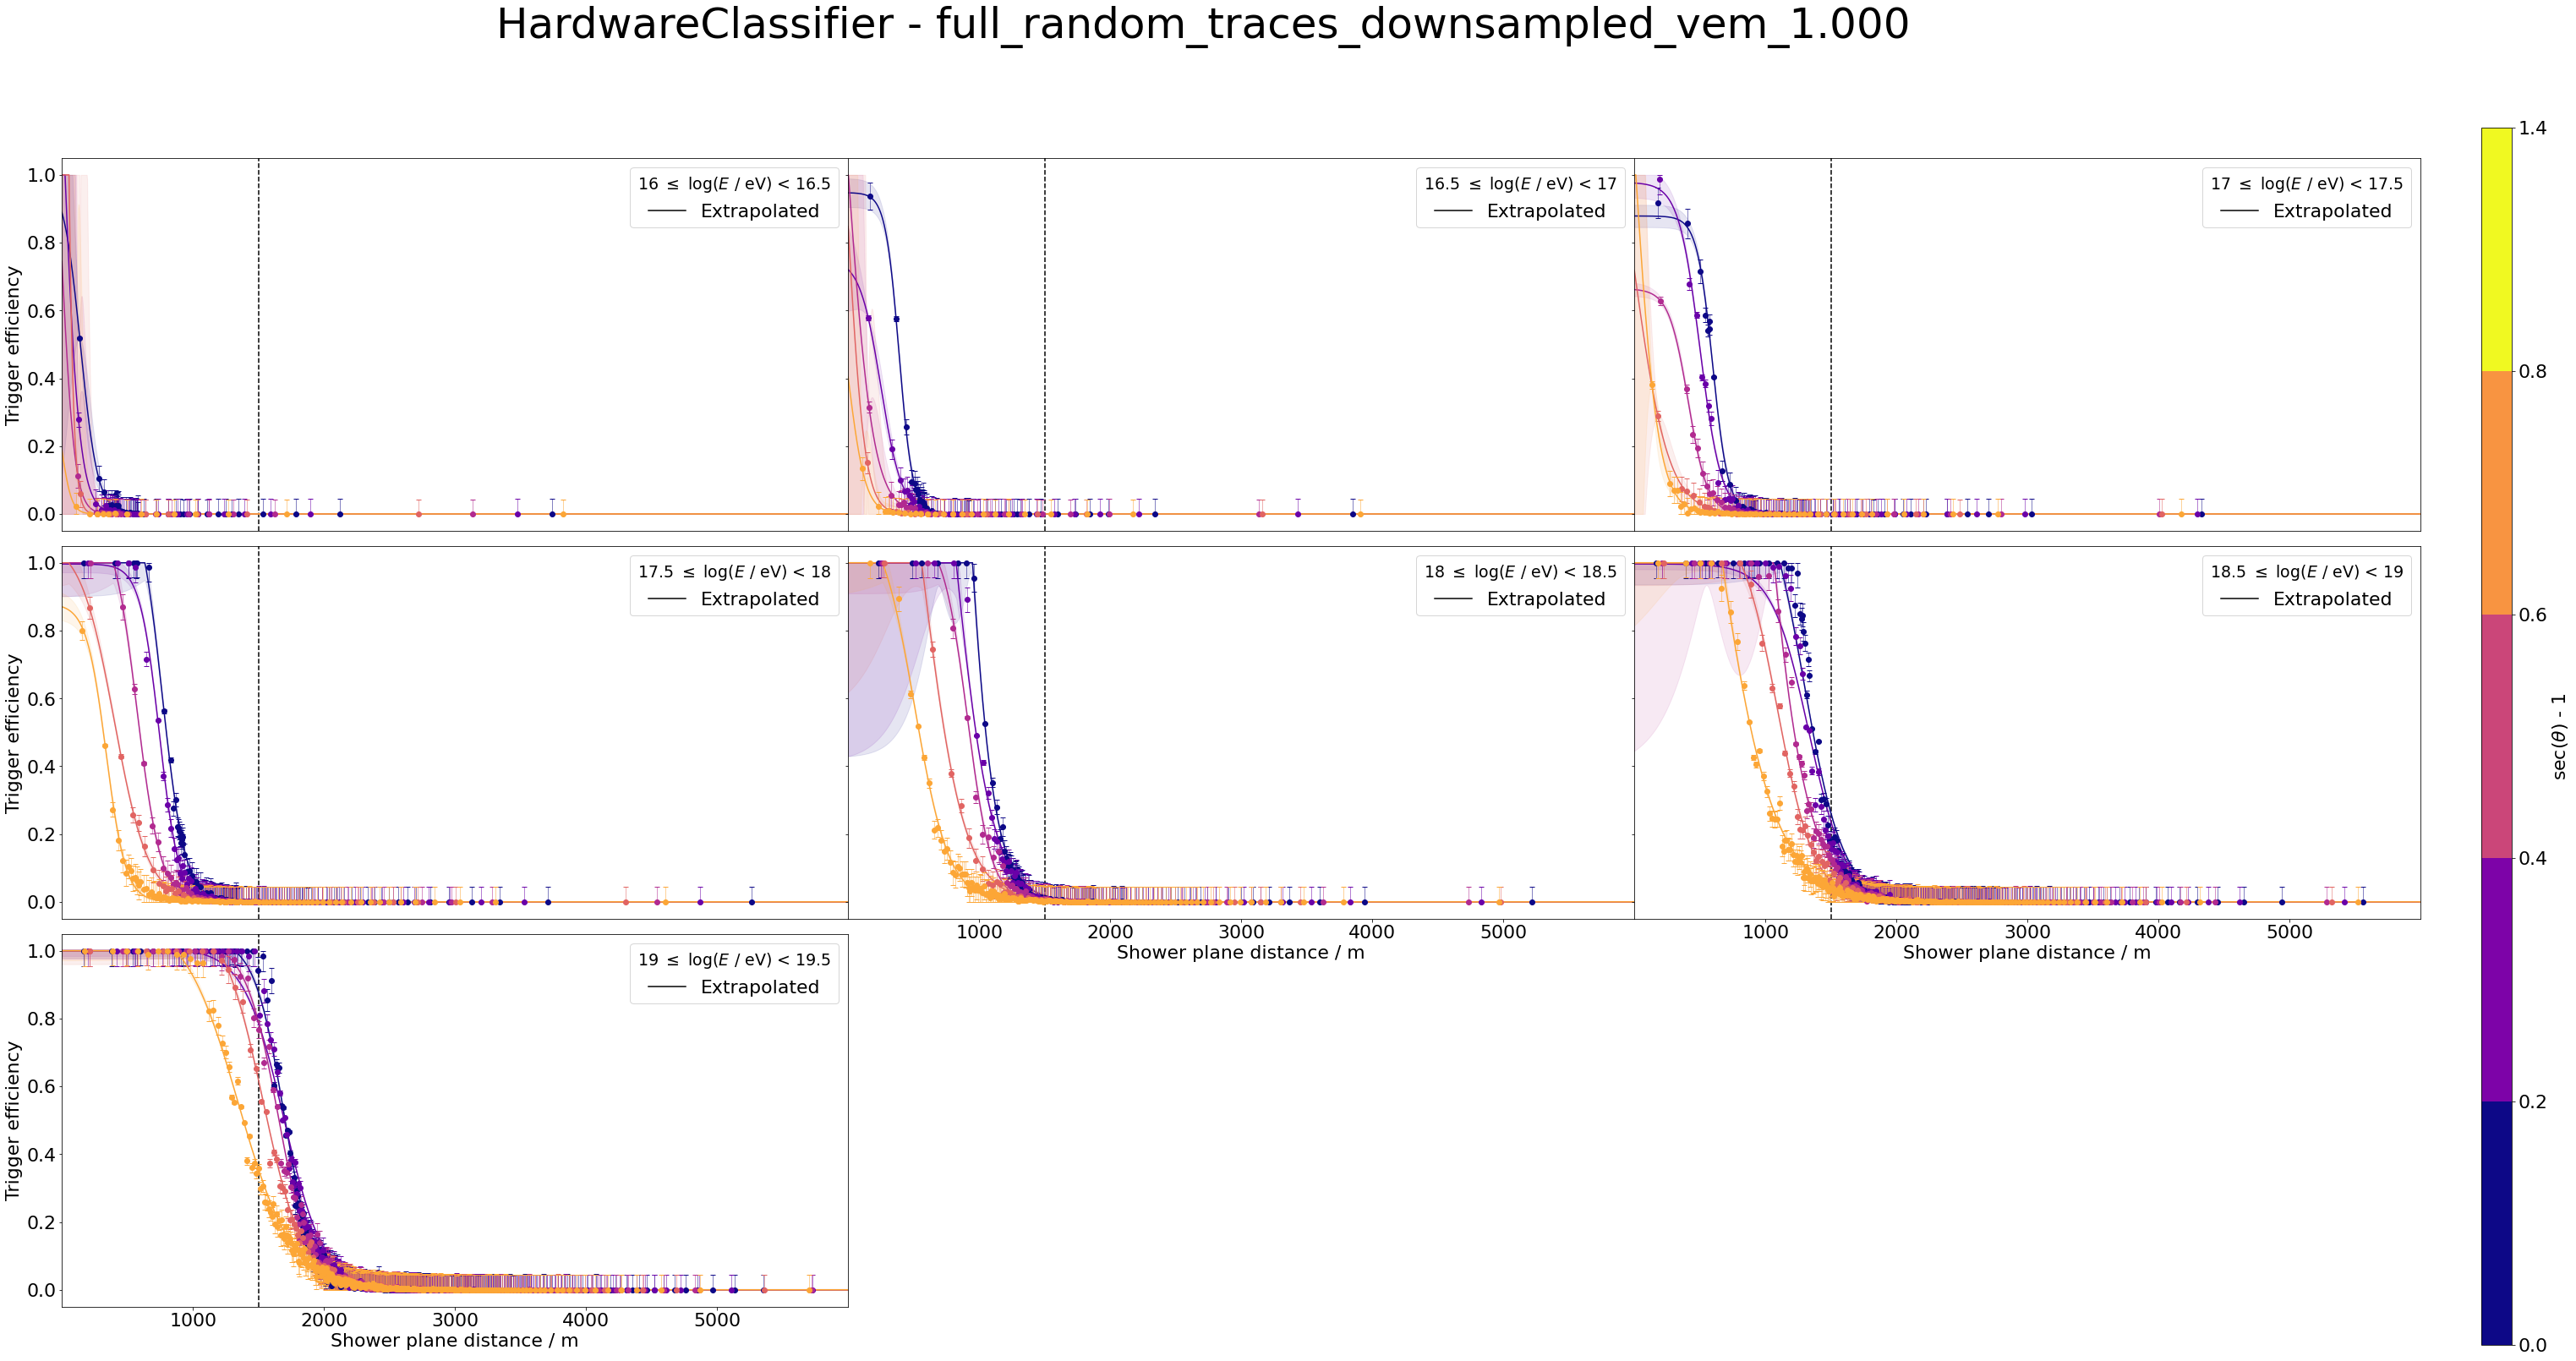

In [7]:
from Binaries import *

LSTM = NNClassifier("120_LSTM_HighEnergy_NoCuts", supress_print = True)
LSTM.spd_energy_efficiency("all_energies")

Hardware = HardwareClassifier()
Hardware.spd_energy_efficiency("full_random_traces_downsampled_vem_1.000")